In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(rc={"figure.figsize":(12, 4)})

In [13]:
data = pd.read_csv('../Data/SQLout_employees.csv')
data.head()


,year,nace,key_l,key_e,location,esize_class,collective,gender,age_class,lpk,...,vacation,gross_salary,bonuses,total,gross_salary_oct,bonuses_oct,bonuses_add_oct,total_oct,hourly_rate,weight
0,2014,I,7294,44259,LT,1_49,D,F,30-39,513,...,13.0,2382.41,0.00,2382.41,248.49,0.0,0.0,248.49,2.09,39.47
1,2014,I,7294,44260,LT,1_49,D,F,50-59,512,...,13.0,2343.61,0.00,2343.61,242.70,0.0,0.0,242.70,2.13,38.62
2,2014,I,7294,44261,LT,1_49,D,F,20-29,512,...,13.0,2363.59,0.00,2363.59,240.09,0.0,0.0,240.09,2.09,39.14
3,2014,I,7294,44262,LT,1_49,D,F,30-39,941,...,13.0,1279.35,0.00,1279.35,239.71,0.0,0.0,239.71,1.82,38.99
4,2014,K,7448,45986,LT,1_49,N,F,40-49,121,...,22.0,16841.60,666.13,17507.73,1332.25,0.0,0.0,1332.25,7.24,15.14


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88116 entries, 0 to 88115
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              88116 non-null  int64  
 1   nace              88116 non-null  object 
 2   key_l             88116 non-null  int64  
 3   key_e             88116 non-null  int64  
 4   location          88116 non-null  object 
 5   esize_class       88116 non-null  object 
 6   collective        88116 non-null  object 
 7   gender            88116 non-null  object 
 8   age_class         88116 non-null  object 
 9   lpk               88116 non-null  int64  
 10  education         88116 non-null  object 
 11  experience        88116 non-null  int64  
 12  arrangement       88116 non-null  object 
 13  work_part         88116 non-null  float64
 14  contract          88116 non-null  object 
 15  weeks             88116 non-null  float64
 16  hours             88116 non-null  int64 

# Data exploration

In [15]:
data['year'] = data['year'].astype('object')
data['lpk'] = data['lpk'].astype('object')


In [16]:
cat_cols = data.select_dtypes('object').columns.to_list()
cat_cols.remove('location')
cat_cols

['year',
 'nace',
 'esize_class',
 'collective',
 'gender',
 'age_class',
 'lpk',
 'education',
 'arrangement',
 'contract']

In [17]:
num_cols = data.select_dtypes('number').columns.to_list()
for col in ['key_e','key_l','gross_salary_oct', 'bonuses_oct', 'bonuses_add_oct', 'gross_salary', 'bonuses']:
    num_cols.remove(col)
num_cols

['experience',
 'work_part',
 'weeks',
 'hours',
 'overtime',
 'vacation',
 'total',
 'total_oct',
 'hourly_rate',
 'weight']

## Interaction between numeric features

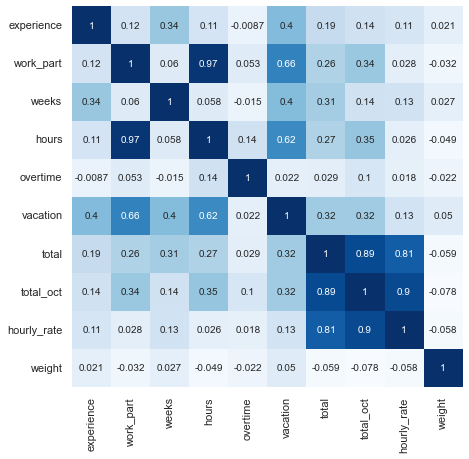

In [18]:
plt.figure(figsize = (7, 7))
sns.heatmap(data[num_cols].corr(), annot=True, cmap='Blues', cbar=False);

Likely target label 'hourly_rate' correlates with total and total_oct, 'hourly_rate' is not significantly affected by other continious variables.

# Decision on target variable

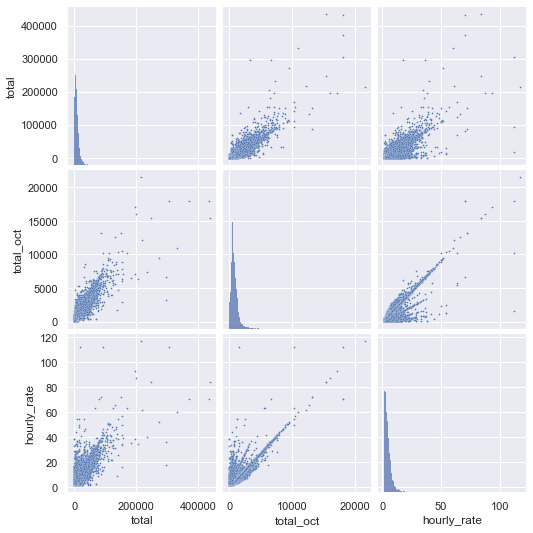

In [19]:
sns.pairplot( data, vars=['total','total_oct','hourly_rate'], plot_kws={"s": 3});

### Interaction of 'total_oct' and 'total' with other variables

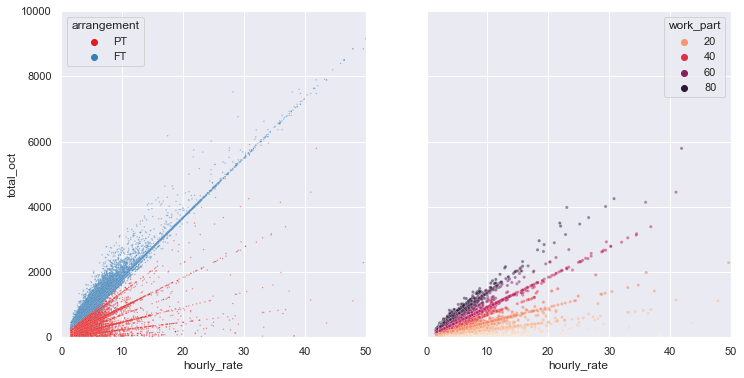

In [20]:
fig, ax = plt.subplots(1,2, sharey=True, sharex=True, figsize=(12,6))
sns.scatterplot(data=data, x='hourly_rate', y='total_oct',
                 hue='arrangement', alpha=0.5, palette='Set1', s=2, ax=ax[0])

sns.scatterplot(data=data.query('arrangement == "PT"'), x='hourly_rate', y='total_oct',
                 hue='work_part', palette='rocket_r', alpha=0.5, s=10, ax=ax[1])
plt.xlim(0, 50)
plt.ylim(0, 10000);

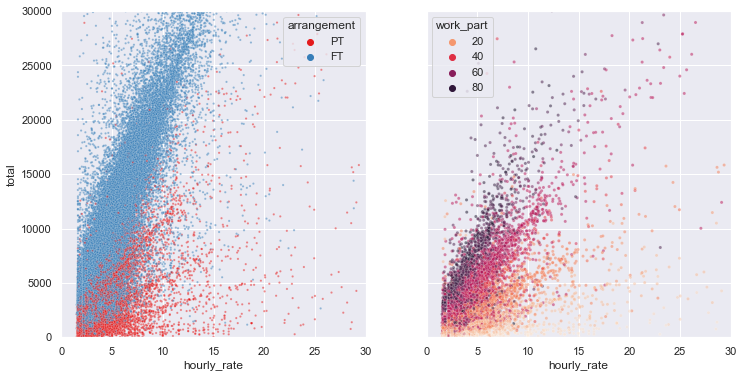

In [21]:
fig, ax = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12,6))
sns.scatterplot(data=data, x='hourly_rate', y='total',
                 hue='arrangement', alpha=0.5, palette='Set1', s=5, ax=ax[0])

sns.scatterplot(data=data.query('arrangement == "PT"'), x='hourly_rate', y='total',
                 hue='work_part', palette='rocket_r', alpha=0.5, s=10, ax=ax[1])
plt.xlim(0, 30)
plt.ylim(0, 30000);    

'total_oct' and 'total' depends on work arrangement and worked time, thus best target variable is 'hourly_reate'

## 'hourly_reate' exploration

### Test if distribution has changed between 2014 and 2018

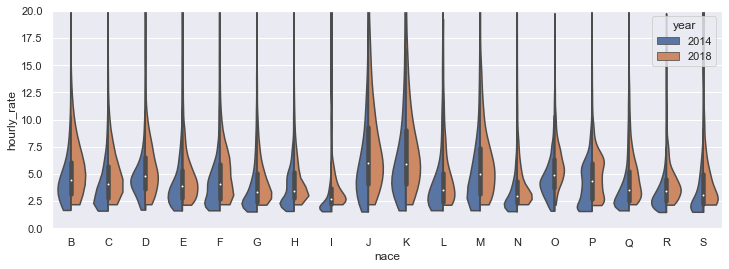

In [22]:
sns.set_theme(rc={"figure.figsize":(12, 4)})
sns.violinplot(data=data.query('arrangement == "FT"'), x='nace', y='hourly_rate', hue='year', split=True,
                    scale="count", cut=0, order=sorted(data.nace.unique()))
plt.ylim(0,20);

The change in hourly rate distribution is large, better to use only data from latest survey. 

### Is the change constant among sectors?

In [23]:
data.groupby('year').nace.value_counts().unstack()

nace,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S
year,,,,,,,,,,,,,,,,,,
2014,363,10284,1005,1172,2303,3161,3895,1225,1729,1389,865,2193,2885,3925,2431,3605,1594,928
2018,410,10277,915,1178,2136,3103,3934,1459,2045,1430,656,2435,2870,2488,2153,3139,1575,961


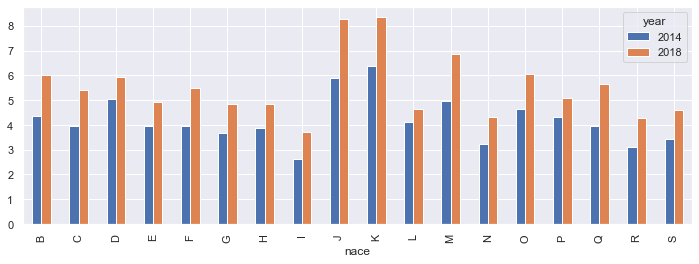

In [24]:
hr_year = data.groupby(['year', 'nace'])['hourly_rate'].mean().unstack().T
hr_year.plot(kind='bar');

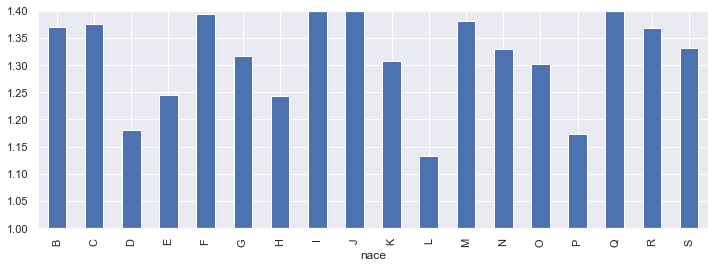

In [25]:
hr_year['ratio'] = hr_year[2018] / hr_year[2014]
hr_year['ratio'].plot(kind='bar')
plt.ylim(1,1.4);


The change varies among sectors

### Effect of work time arrangment on hourly rate (using only 2018 data)

In [26]:
data2018 = data.query('year == 2018').copy()

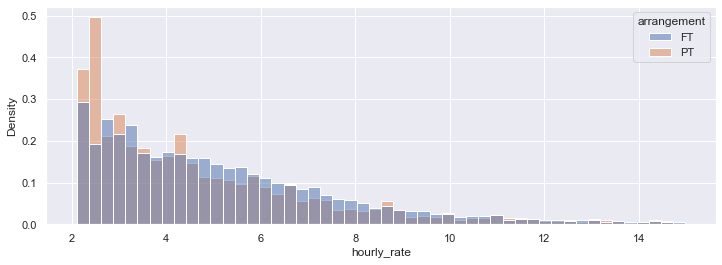

In [27]:
sns.histplot(data=data2018.query('hourly_rate < 15'), x='hourly_rate', hue='arrangement',
                                 bins=50, stat='density', common_norm=False);


In [28]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(data2018.query('arrangement == "PT"')['hourly_rate'], data2018.query('arrangement == "FT"')['hourly_rate'])
print(f" Mann–Whitney U Test: statistic={stat:.4f}, p-value={p:.4f}")


 Mann–Whitney U Test: statistic=103845986.0000, p-value=0.0000


In [29]:
data2018['wp_group'] = pd.cut(data2018['work_part'], range(0,101,20))
data2018.groupby('wp_group')['work_part'].count()

wp_group
(0, 20]       1249
(20, 40]      1356
(40, 60]      2577
(60, 80]      1052
(80, 100]    36930
Name: work_part, dtype: int64

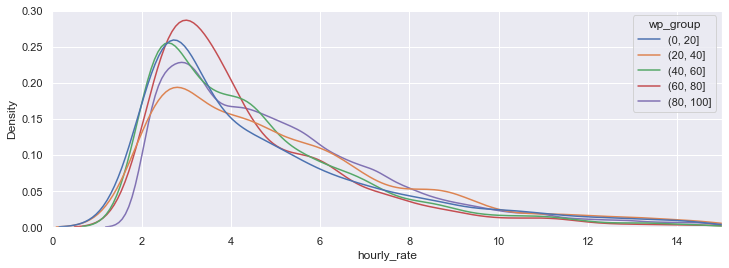

In [30]:
sns.kdeplot(data=data2018.query('hourly_rate < 15'), x='hourly_rate', hue='wp_group', common_norm=False);
plt.xlim(0,15);


In [31]:
wp_grouped = list(data2018.groupby('wp_group')['work_part'])
from scipy.stats import f_oneway
stat, p = f_oneway(wp_grouped[0][1], wp_grouped[1][1], wp_grouped[2][1], wp_grouped[3][1], wp_grouped[4][1])
print('ANOVA F=%.3f, p=%.3f' % (stat, p))

ANOVA F=1480195.261, p=0.000


In [42]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=data2018['hourly_rate'],  groups=data2018['wp_group'], alpha=0.05)
print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1    group2  meandiff p-adj   lower   upper  reject
---------------------------------------------------------
 (0, 20]  (20, 40]    0.053 0.9966 -0.3544  0.4605  False
 (0, 20]  (40, 60]  -0.6908    0.0 -1.0489 -0.3326   True
 (0, 20]  (60, 80]  -0.8797    0.0 -1.3145 -0.4449   True
 (0, 20] (80, 100]  -0.0548 0.9874 -0.3537  0.2441  False
(20, 40]  (40, 60]  -0.7438    0.0 -1.0923 -0.3952   True
(20, 40]  (60, 80]  -0.9328    0.0 -1.3596 -0.5059   True
(20, 40] (80, 100]  -0.1078 0.8444 -0.3951  0.1794  False
(40, 60]  (60, 80]   -0.189 0.6559 -0.5691  0.1912  False
(40, 60] (80, 100]    0.636   -0.0  0.4243  0.8476   True
(60, 80] (80, 100]   0.8249    0.0  0.5001  1.1498   True
---------------------------------------------------------


### Normality test of full time employees hourly rate

In [33]:
hr_2018_ft = data2018.query('arrangement == "FT"')['hourly_rate']

In [34]:
from scipy.stats import normaltest
stat, p = normaltest(hr_2018_ft)
print('D’Agostino K^2 statistics=%.3f, p=%.3f' % (stat, p))

D’Agostino K^2 statistics=39235.855, p=0.000


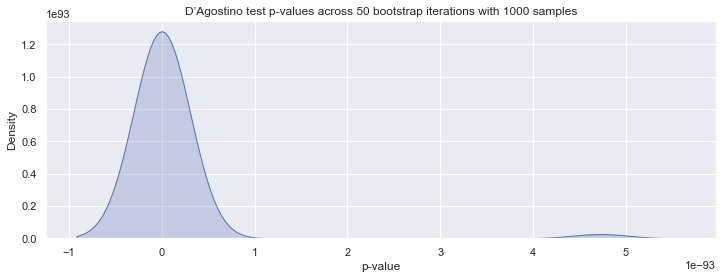

In [35]:
from sklearn.utils import shuffle
n_iterations = 50
n_samples=1000
stat = np.empty(n_iterations)
p = np.empty(n_iterations)
for i in range(n_iterations):
    stat[i], p[i] = (normaltest(shuffle(hr_2018_ft, n_samples=n_samples)))
sns.kdeplot(data=p, shade=True)
plt.title('D’Agostino test p-values across %.0f bootstrap iterations with %.0f samples' % (n_iterations, n_samples))
plt.xlabel("p-value");